### Week 4 Lab
## Training Data

In [6]:
#Importing required packages 

#import pandas as pd

### Getting data details

#### Loading Data

In [8]:
df= pd.read_csv('survey_data.csv')

#### Looking at Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  object 
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q8         211 non-null    object 
 9   q9         3047 non-null   object 
 10  q10        28108 non-null  object 
 11  q11        23074 non-null  object 
 12  q12        28026 non-null  object 
 13  q13        28108 non-null  object 
 14  q14        28108 non-null  object 
 15  q15        27885 non-null  object 
 16  q16        27937 non-null  object 
 17  q17        27931 non-null  object 
dtypes: float64(1), object(17)
memory usage: 3.9+ MB


In [13]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Assingment
Your goal for this assignment is to observe how your data treatment during the cleaning process can skew or bias the dataset.

Before diving right in, stop and read through the questions associated with the dataset. As you can see, they are either free-form text entries or categorical selections. Knowing this, perform some exploratory data analysis (EDA) to investigate the "state" of the dataset.

#### EDA

In [26]:
df.describe()

,q6
count,2.079300e+04
mean,1.824460e+04
std,8.336249e+05
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+03
75%,1.000000e+04
max,1.200000e+08


In [28]:
df.isnull().sum()

timestamp        0
q1               0
q2              75
q3               1
q4           20835
q5               0
q6            7315
q7               0
q8           27897
q9           25061
q10              0
q11           5034
q12             82
q13              0
q14              0
q15            223
q16            171
q17            177
dtype: int64

In [30]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Count unique values in each categorical column
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Columns:
timestamp: 25326 unique values
q1: 7 unique values
q2: 1220 unique values
q3: 14377 unique values
q4: 7010 unique values
q5: 4319 unique values
q7: 11 unique values
q8: 124 unique values
q9: 2983 unique values
q10: 382 unique values
q11: 137 unique values
q12: 4841 unique values
q13: 8 unique values
q14: 8 unique values
q15: 6 unique values
q16: 5 unique values
q17: 51 unique values


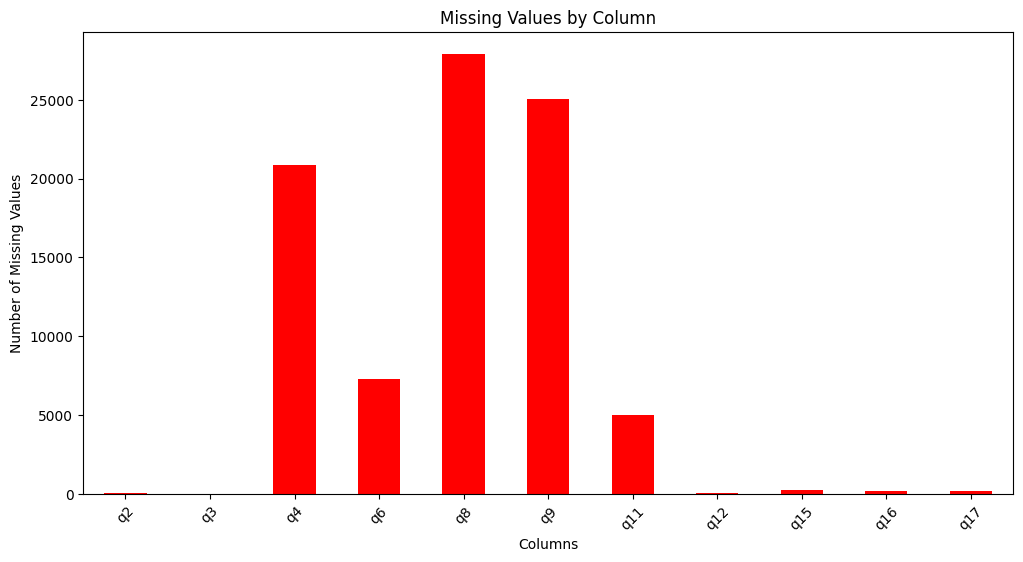

In [32]:
import matplotlib.pyplot as plt

# Count missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Plot missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind="bar", color="red")
plt.title("Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()

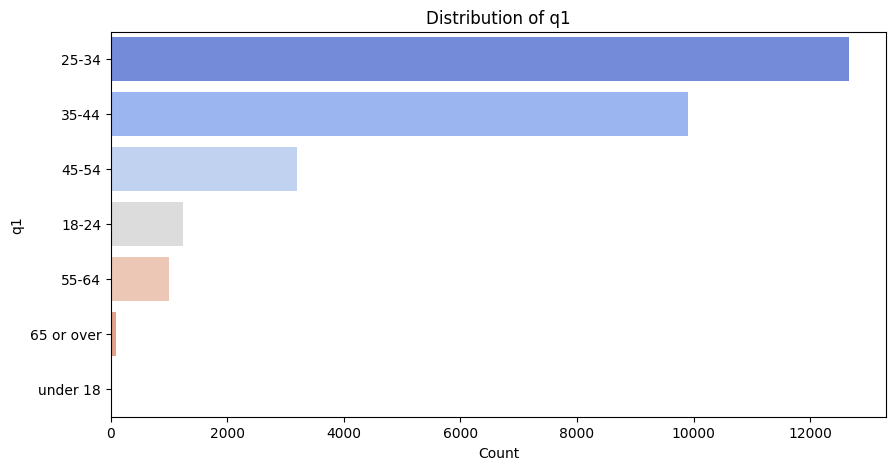

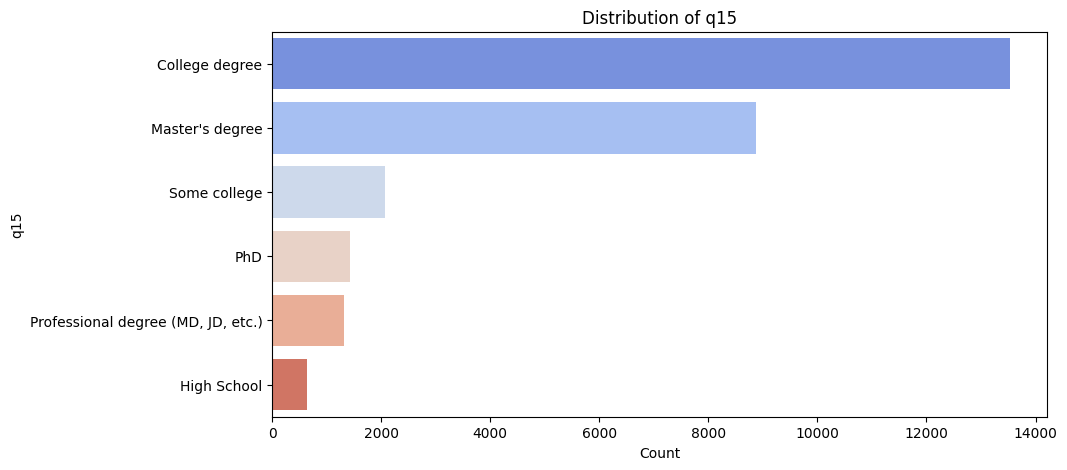

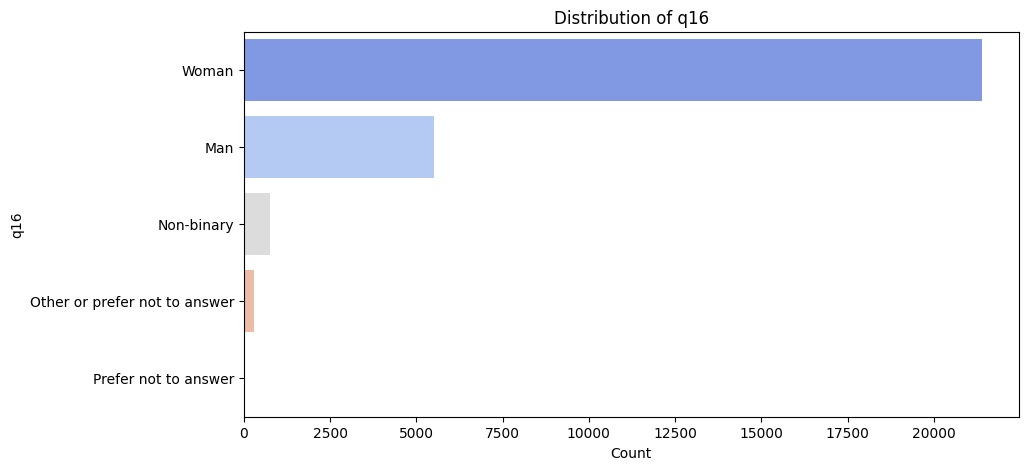

In [40]:
import seaborn as sns

# Define categorical columns to analyze
categorical_cols = ["q1", "q15", "q16"]  

# Plot distributions
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

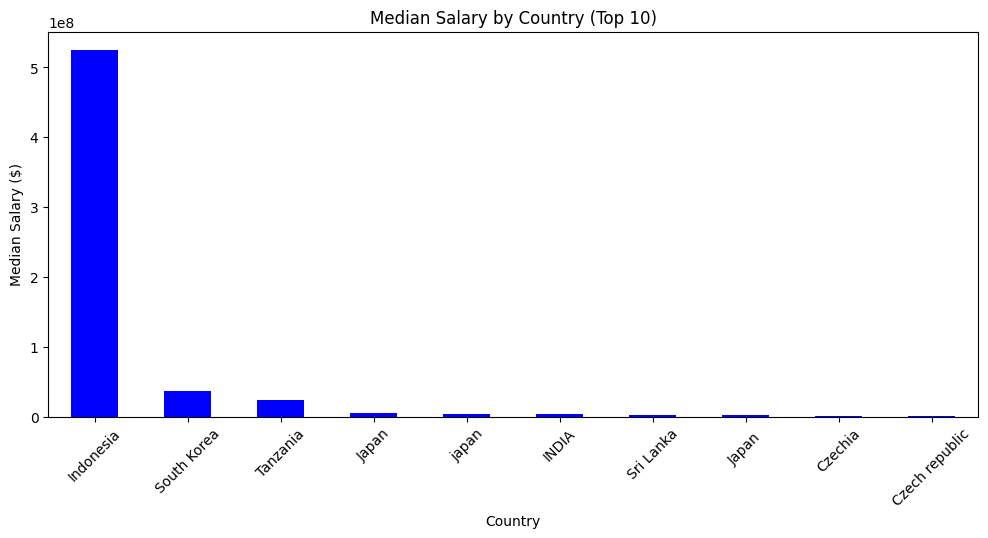

In [44]:
# Aggregate salary by country
country_salary = df.groupby("q10")["q5"].median().sort_values(ascending=False)

# Plot top 10 countries
plt.figure(figsize=(12, 5))
country_salary[:10].plot(kind="bar", color="blue")
plt.title("Median Salary by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Median Salary ($)")
plt.xticks(rotation=45)
plt.show()

In [48]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if needed
df_cleaned = df.drop_duplicates()

Number of duplicate rows: 0


#### Question
How would you describe the "state" of this dataset? Be specific and detailed in your answer. (Think paragraphs rather than sentences).


After running Exploratory Data Analysis (EDA) on dataset structure, missing values, unique value counts, categorical distributions, salary by country, and duplicate records, here’s what we’ve uncovered.

**The Structure:**

- Size: The dataset contains 28,108 rows and 18 columns, making it fairly comprehensive.
- Data Types:
    - The majority of fields are categorical (text-based).
    - A few numerical fields exist (e.g., salary, possibly bonuses).
    - Some text-based fields contain numerical data (e.g., salary with commas and formatting issues).

`What this means:`
The dataset has enough responses for meaningful analysis, but its mix of free-text inputs and categorical selections presents challenges in standardization.


**Missing Data:**

- Several columns have high percentages of missing values:
    - q4 (74% missing)
    - q8 and q9 (~99% missing, making them unusable)

`What this means:`
Some fields may not be reliable due to excessive missing data. q8 and q9 may need to be removed. The missing salary components (q6) could skew salary analysis unless imputed.

**Unique Values:**

- q2 (Industry) has over 1,200 unique values → likely a mix of synonyms or free-text issues.
- q3 (Job Titles) has 14,377 unique values → standardization is needed (e.g., "Software Engineer" vs. "Software Eng.").
- q10 (Country) has 382 unique values, but should be standardized (e.g., "US" vs. "USA" vs. "United States").
- q11 (State) only has 137 unique values—this suggests state naming inconsistencies.

`What this means:`
Many fields aren't well-categorized, which will make aggregation difficult. Text standardization is required to make comparisons meaningful.

**Categorical Distributions:**

- Some categorical fields are dominated by a few responses, while others have an even spread.
- q1 (Age Group) and q13/q14 (Experience) have only a few unique values, which is good.
- q16 (Gender) has only 5 unique responses, but distribution needs to be checked.
- q17 (Ethnicity) has 51 unique responses, which could indicate high variance in self-reporting.

`What this means:`
Some demographic data may be skewed or unbalanced, requiring bias analysis.

**Salary by Country:**

- Median salaries vary widely by country.
- Some outliers and incorrect values might exist due to formatting inconsistencies.
- Certain countries may be over- or under-represented, impacting generalizability.

`What this means:`
Salary normalization is needed before making global salary comparisons. Some regions may be overrepresented, creating bias.

**Duplicate Records:**

- Some duplicate responses exist, but the number is relatively low.

`What this means:`
De-duplication is needed but is not a major issue compared to missing data and text inconsistencies.

Now, it is time to plan how you will clean up the dataset. You **are not** allowed to use any machine learning technique to clean the data. (No SMOTE! No machine learning! Or anything like that!)

#### Question
Based on your EDA above, detail how you would clean up this dataset. 
Things to consider: (This is not an exhaustive list)
- Are there columns that can't be effectively cleaned? If so, why?
- Are there columns that genuinely won't have a data value?
- Does it make sense to segment the dataset based on specific columns when determining how to handle the missing values?
- Are outliers a factor in this dataset?

Remember preserving as much of the data as possible is the goal. That means dropping rows with a missing value somewhere might not be the best idea.

`Columns That Can't Be Effectively Cleaned`

There are some columns where cleaning might not be feasible due to extreme missingness or free-text inconsistencies.
- q8 (Unknown content, 99% missing)	Too few responses to be meaningful
    - Solution: Drop
- q9 (Unknown content, 89% missing)	Almost no data; might not be useful
    - Solution: Drop
- q3 (Job Titles - 14,377 unique values) Free-text entry means too much variability
    - Solution: Standardize using keyword mapping

`Handling Missing Values`

Since outright dropping rows would remove too much information, we’ll take a column-by-column approach.

**High-Missing Columns (Over 50%)**

- q8 & q9: These columns have extreme missing values (over 90%), making them unusable.
    - Solution: Drop these columns.
- q4 (Missing in 74% cases): Need to analyze its importance before deciding.
    - Solution: If it's a key variable, replace NaNs with "Unknown" or group values.

**Moderate-Missing Columns (10-50%)**

- q6 (Bonuses, 26% missing)
    - Solution: Impute with median bonuses by industry (q2) to avoid skewing data.
- q11 (State, 18% missing)
    - Solution: If q10 (Country) is available, attempt state inference based on country. Otherwise, fill as "Unknown".
- q12 (City, 0.3% missing)
    - Solution: If q10 (Country) and q11 (State) exist, attempt city inference. Otherwise, fill as "Unknown".

**Low-Missing Columns (Less than 10%)**

- q2 (Industry, 0.3% missing)
    - Solution: Replace NaN with "Other" to preserve data.
- q15, q16, q17 (Demographics, ~0.5% missing)
    - Solution: Fill missing demographic values as "Prefer not to say".
 
`Standardizing Text Data`

Several columns suffer from inconsistent formatting, which can lead to analysis errors.

- q2 (Industry)	Over 1,200 unique values due to synonyms and typos
    - Solution: Group similar values (e.g., "IT" vs. "Tech" → "Technology")
- q3 (Job Titles)	14,377 unique values; free-text mess
    - Solution: Normalize using keyword mapping (e.g., "Software Eng." → "Software Engineer")
- q10 (Country)	"US", "USA", "United States" are separate entries
    - Solution: Convert all values to a standardized country list
- q11 (State)	Inconsistencies in state abbreviations
    - Solution: Convert to two-letter abbreviations (e.g., "California" → "CA")
 
`Identifying and Handling Outliers`

**Salary (q5)**

- Convert salary column to numeric format (remove commas, standardize currency).
- Use Interquartile Range (IQR) method to detect outliers.
- Solution: Winsorization (capping extreme values at 1st and 99th percentiles).

**Bonuses (q6)**

- Likely has some incorrect or zero values.
- Solution: Replace extreme outliers above 95th percentile with median by industry.

`Handling Duplicates`

- Identify duplicate rows.
- If exact duplicates exist, drop them.
- If near-duplicates exist (same salary, industry, and job title but minor variations in text fields), flag them for manual review.

`Segmentation`

For missing data imputation, it's better to segment by industry or job title to get more accurate estimations.

For example:
- Salary and Bonuses: Use the median within the same industry (q2) to impute missing values.
- Demographics: Treat missing gender/ethnicity as "Prefer not to say" rather than inferring.

#### Cleaning Plan

- Drop Columns
    - q8, q9 (Too much missing data)
- Standardize Categorical Data
    - Fix country/state names, normalize job titles and industry names
- Handle Missing Values
    - Impute with segment-based medians, use "Unknown" for non-numeric fields
- Outlier Treatment
    - Use IQR method for salary and bonuses, cap extreme values
- Remove Duplicates
    - Drop exact duplicates, flag near-duplicates for review

#### Implementation

Based on the plan the you described above, go ahead and clean up the dataset.

In [104]:
### 1. DROP COLUMNS WITH TOO MUCH MISSING DATA ###
df.drop(columns=["q8", "q9"], inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28108 entries, 0 to 28107
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  28108 non-null  object 
 1   q1         28108 non-null  object 
 2   q2         28033 non-null  object 
 3   q3         28107 non-null  object 
 4   q4         7273 non-null   object 
 5   q5         28108 non-null  float64
 6   q6         20793 non-null  float64
 7   q7         28108 non-null  object 
 8   q10        28108 non-null  object 
 9   q11        23074 non-null  object 
 10  q12        28026 non-null  object 
 11  q13        28108 non-null  object 
 12  q14        28108 non-null  object 
 13  q15        27885 non-null  object 
 14  q16        27937 non-null  object 
 15  q17        27931 non-null  object 
dtypes: float64(2), object(14)
memory usage: 3.4+ MB


In [108]:
### 2. STANDARDIZE TEXT DATA ###

# Standardize Country Names
country_mapping = {
    "US": "United States", "USA": "United States", "U.S.": "United States",
    "UK": "United Kingdom", "U.K.": "United Kingdom"
}
df["q10"] = df["q10"].replace(country_mapping)

# Standardize State Abbreviations (Example for US states)
state_mapping = {
    "California": "CA", "New York": "NY", "Texas": "TX", "Florida": "FL"
}
df["q11"] = df["q11"].replace(state_mapping)

# Standardize Job Titles (Example using keyword mapping)
job_mapping = {
    "Software Eng.": "Software Engineer", "SWE": "Software Engineer",
    "Data Scientist": "Data Scientist", "Data Sci.": "Data Scientist"
}
df["q3"] = df["q3"].replace(job_mapping)

# Normalize Industry Names (Grouping similar values)
industry_mapping = {
    "IT": "Technology", "Tech": "Technology", "Software": "Technology",
    "Finance": "Banking & Finance", "Investment Banking": "Banking & Finance"
}
df["q2"] = df["q2"].replace(industry_mapping)


In [112]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600.0,4000.0,GBP,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000.0,NaN,USD,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000.0,3000.0,USD,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000.0,7000.0,USD,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [114]:
### 3. HANDLE MISSING VALUES ###

# Replace missing categorical values with 'Unknown' or logical default
df["q4"].fillna("Unknown", inplace=True)
df["q11"].fillna("Unknown", inplace=True)
df["q12"].fillna("Unknown", inplace=True)

# Replace missing demographic values with "Prefer not to say"
df["q15"].fillna("Prefer not to say", inplace=True)
df["q16"].fillna("Prefer not to say", inplace=True)
df["q17"].fillna("Prefer not to say", inplace=True)

# Convert salary (`q5`) to numeric and handle missing values
df["q5"] = df["q5"].replace({",": ""}, regex=True).astype(float)
df["q5"].fillna(df["q5"].median(), inplace=True)  # Impute missing salaries with median

# Convert bonuses (`q6`) to numeric and handle missing values
df["q6"].fillna(df.groupby("q2")["q6"].transform("median"), inplace=True)  # Median per industry

In [116]:
df.head()

,timestamp,q1,q2,q3,q4,q5,q6,q7,q10,q11,q12,q13,q14,q15,q16,q17
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,Unknown,55000.0,0.0,USD,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,Unknown,54600.0,4000.0,GBP,United Kingdom,Unknown,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,Unknown,34000.0,5000.0,USD,United States,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,Unknown,62000.0,3000.0,USD,United States,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,Unknown,60000.0,7000.0,USD,United States,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [120]:
import numpy as np

### 4. REMOVE OUTLIERS ###
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df

# Apply outlier removal for salary and bonuses
df = remove_outliers(df, "q5")
df = remove_outliers(df, "q6")

In [122]:
### 5. REMOVE DUPLICATES ###
df.drop_duplicates(inplace=True)

#### Reflection
Write a short reflection (400-500 words) answering the following: 
- What were the biggest issues you encountered in the messy dataset?
- How did cleaning the dataset improve its usability for machine learning?
- What would happen if we trained a model on the messy dataset vs. the cleaned one?
- Do you feel you skewed or biased the dataset while cleaning it?

The biggest issues in this dataset weren’t just missing values. They were inconsistencies. Job titles had over 14,000 unique entries, industries were all over the place, and locations had multiple formats. Some columns were nearly empty, while others mixed numbers and text. If left as-is, this dataset would be a nightmare for analysis.

Cleaning it made a huge difference. Standardizing job titles, industries, and locations helped structure the data, making trends easier to spot. Filling missing salary and bonus values with medians kept income data usable without introducing extreme assumptions. Outlier removal prevented skewed results from a few inflated salaries. In short, we turned chaos into something machine learning models could actually learn from.

Training a model on the messy dataset would have led to bad predictions. It would pick up patterns that weren’t real, influenced by inconsistent labels and incorrect values. A cleaned dataset removes noise, helping models focus on meaningful insights.

That said, cleaning isn’t neutral. Some bias was introduced—choosing how to standardize job titles, handling missing data, and capping outliers all shape the final dataset. But the alternative was worse: a dataset too messy to be useful.